In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from umap import UMAP
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris, load_diabetes, load_breast_cancer
from sklearn.cluster import KMeans

Construyo el dataframe de los datos

In [3]:
data = load_iris()
X = pd.DataFrame(data = data.data, columns = data.feature_names)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Escalo los datos:

In [1]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

NameError: name 'StandardScaler' is not defined

In [ ]:
X_scaled.shape

(150, 4)

UMAP

In [ ]:
X_reduced = UMAP(n_neighbors = 15, min_dist=0.01).fit_transform(X_scaled)

Grafico:

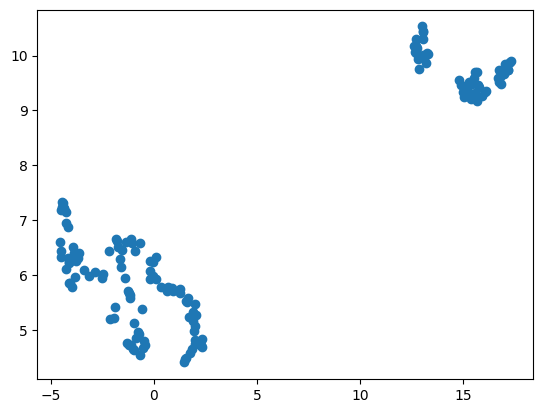

In [ ]:
plt.scatter(x = X_reduced[:,0], y = X_reduced[:,1])

## Probaremos con dos componentes

In [ ]:
kmeans = KMeans(n_clusters = 2).fit(X_reduced)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
X_reduced[0]

array([14.6599  ,  5.571354], dtype=float32)

In [ ]:
centers

array([[15.466417 ,  4.7819324],
       [ 1.9908042,  2.1250947]], dtype=float32)

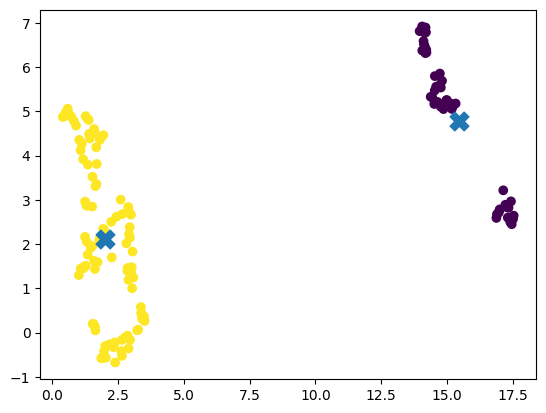

In [ ]:
plt.scatter(x = X_reduced[:,0], y = X_reduced[:,1], c = kmeans.predict(X_reduced))
plt.scatter(x = centers[:,0], y =centers[:,1], marker = 'X', s = 180)

Probamos ahora con 3 componentes

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(X_reduced)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[ 2.3448014,  0.7813473],
       [15.466417 ,  4.7819324],
       [ 1.5215487,  3.9063408]], dtype=float32)

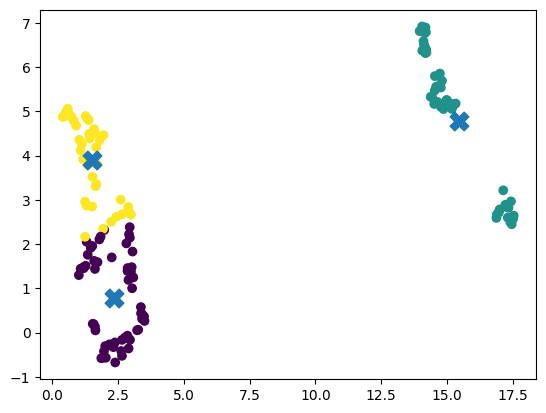

In [ ]:
plt.scatter(x = X_reduced[:,0], y = X_reduced[:,1], c = kmeans.predict(X_reduced))
plt.scatter(x = centers[:,0], y =centers[:,1], marker = 'X', s = 180)

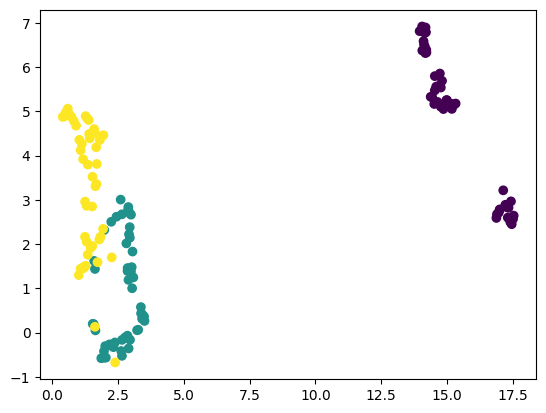

In [ ]:
plt.scatter(x = X_reduced[:,0], y = X_reduced[:,1], c = data.target)

Prueba ahora el flujo de trabajo con los dos datasets restantes.

Datos -> Escalamiento -> Reducción de dimensionalidad -> Algoritmo de clustering

In [ ]:
data_diabetes = load_diabetes()
data_breast_cancer = load_breast_cancer()

In [ ]:
X_diabetes = pd.DataFrame(data = data_diabetes.data , columns = data_diabetes.feature_names)
X_breast_cancer = pd.DataFrame(data = data_breast_cancer.data , columns = data_breast_cancer.feature_names)